# Playstore EDA

# Objective
Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.


The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset

In [169]:
df = pd.read_csv("playstore-analysis (2) (1).csv")

In [170]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [172]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Task:1 Data clean up – Missing value treatment


### a. Drop records where rating is missing since rating is our target/study variable

In [173]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7700.0,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [174]:
df.dropna(how='any', axis=0,subset=['Rating'] ,inplace = True)

In [175]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column.
   

#### i. Are all 3 records having the same problem?

In [176]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes, all 3 records are having Null values.

#### ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [177]:
df.drop(axis=0 ,index = 10472, inplace = True)

In [178]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [179]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

### c. Current ver – replace with most common value

In [180]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

# Task: 2. Data clean up – correcting the data types

In [181]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [233]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Price             float64
dtype: object

### a. Which all variables need to be brought to numeric types?


Reviews and installs 

### b. Price variable – remove $ sign and convert to float

In [182]:
price = []
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  


In [183]:
df.drop('Price',axis=1,inplace=True)
df['Price']=price
df['Price']=df['Price'].astype('float')

In [184]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [185]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Price             float64
dtype: object

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer


In [186]:
install = []
for i in df['Installs']:
    install.append(i.replace(',','').replace('+','').strip())

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

In [187]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Price             float64
dtype: object

### d. Convert all other identified columns to numeric

In [188]:
df['Reviews']= df['Reviews'].astype('int')

# Task 3. Sanity checks – check for the following and handle accordingly

## a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### i. Are there any such records? Drop if so

In [189]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price


No such rating found

## b. Reviews should not be more than installs as only those who installed can review the app.

### i. Are there any such records? Drop if so.

In [190]:
df.loc[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,0.00
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,2.49
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,1.49
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up,0.00
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,0.00
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,Teen,Social,"July 23, 2018",1.0,4.0 and up,0.00
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,0.99


In [191]:
indexs = df[df['Reviews']>df['Installs']].index

In [192]:
df.drop(labels=indexs, inplace=True)

# Task 4. Identify and handle outliers –

# a. Price column

### i. Make suitable plot to identify outliers in price

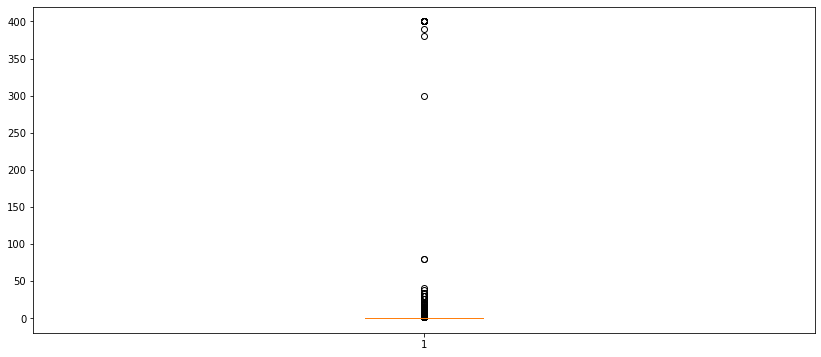

In [193]:
plt.figure(figsize=(14,6))
plt.boxplot(df['Price'])
plt.show()

### ii.Do you expect apps on the play store to cost $200? Check out these cases

In [194]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,399.99
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,400.00
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,399.99
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,399.99
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,299.99
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,399.99
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,379.99
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,399.99
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,399.99


### iv. Limit data to records with price < $30

In [195]:
more_30 = df[df['Price'] > 30].index
df.drop(labels=more_30, inplace=True)

### iii. After dropping the useless records, make the suitable plot again to identify outliers

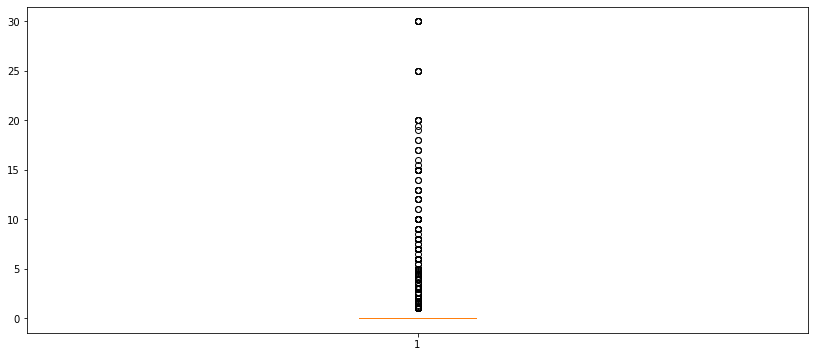

In [196]:
plt.figure(figsize=(14,6))
plt.boxplot(df['Price'])
plt.show()

## b. Reviews column

### i. Make suitable plot

In [197]:
df.iloc[:,[0,3]]

,App,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,159
1,Coloring book moana,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510
3,Sketch - Draw & Paint,215644
4,Pixel Draw - Number Art Coloring Book,967
...,...,...
10834,FR Calculator,7
10836,Sya9a Maroc - FR,38
10837,Fr. Mike Schmitz Audio Teachings,4
10839,The SCP Foundation DB fr nn5n,114


<Figure size 72x72 with 0 Axes>

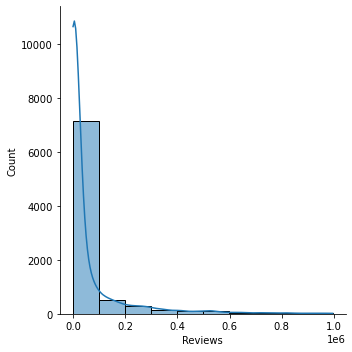

In [231]:
plt.figure(figsize=(1,1))
sns.displot(df['Reviews'],bins = 10, kde = True)
plt.show()


### ii. Limit data to apps with < 1 Million reviews

In [199]:
morethan_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = morethan_1m, inplace=True)
print(morethan_1m.value_counts().sum(),'cols dropped')

704 cols dropped


## c. Installs

### i. What is the 95th percentile of the installs?

In [200]:
percentile = df.Installs.quantile(0.95)

In [201]:
print(percentile)

10000000.0


### ii.Drop records having a value more than the 95th percentile

In [202]:
remove = df[df['Installs'] > percentile].index
df.drop(labels = remove, inplace = True)


In [203]:
print(remove)
print(remove.value_counts().sum())

Int64Index([    3,   143,   188,   192,   225,   292,   346,   348,   369,
              389,
            ...
             9844, 10010, 10196, 10253, 10378, 10408, 10429, 10513, 10549,
            10647],
           dtype='int64', length=199)
199


# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

### a. How do you explain this?

<Figure size 1008x432 with 0 Axes>

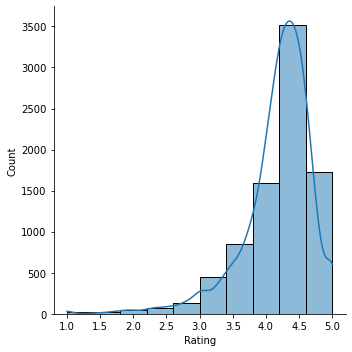

In [232]:
plt.figure(figsize=(14,6))
sns.displot(df['Rating'],bins=10,kde=True)
plt.show()

In [205]:
print('skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution so its skewed towards Higher values'.format(df.Rating.median(),df.Rating.mean()))

skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution so its skewed towards Higher values


### b. What is the implication of this on your analysis?

In [206]:
df['Rating'].mode()

0    4.3
dtype: float64

Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards higher values.

## 6. What are the top Content Rating values?

### a. Are there any values with very few records?

In [207]:
df["Content Rating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### b. If yes, drop those as they won’t help in the analysis

In [208]:
df["Content Rating"]=df["Content Rating"].str.replace("Adults only 18+","NaN")
df["Content Rating"]=df["Content Rating"].str.replace("Unrated","NaN")

In [209]:
temp = df[df["Content Rating"] == 'NaN'].index
df.drop(labels=temp, inplace=True)

In [210]:
temp2 = df[df["Content Rating"] == 'NaN+'].index
df.drop(labels=temp2, inplace=True)

In [211]:
df["Content Rating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

<Figure size 1008x432 with 0 Axes>

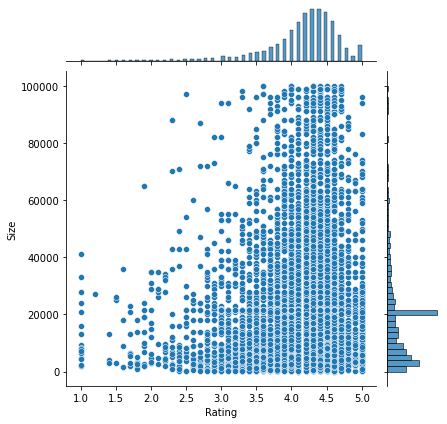

In [212]:
plt.figure(figsize=(14,6))
sns.jointplot(y ='Size', x ='Rating', data = df)
plt.show()

## b. Do you see any patterns?

Yes

## c. How do you explain the pattern?

On increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

## 8. Effect of price on rating

### a. Make a jointplot (with regression line)

<Figure size 1008x432 with 0 Axes>

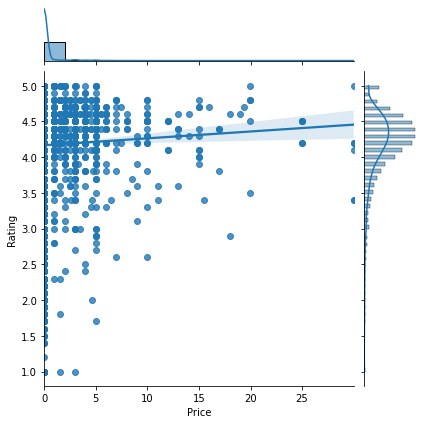

In [213]:
plt.figure(figsize=(14,6))
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

### b. What pattern do you see?

on increasing the Price, Rating remains almost constant greater than 4.

### c. How do you explain the pattern?

In [214]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

### d. Replot the data, this time with only records with price > 0

In [215]:
pq=df[df["Price"]>0]

<Figure size 1008x432 with 0 Axes>

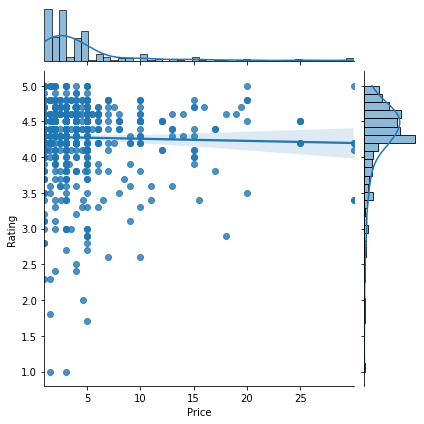

In [216]:
plt.figure(figsize=(14,6))
sns.jointplot(x='Price', y='Rating', data=pq, kind='reg')
plt.show()

### e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

### f. What is your overall inference on the effect of price on the rating

In [217]:
pq.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

## 9. Look at all the numeric interactions together –

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

<Figure size 1008x432 with 0 Axes>

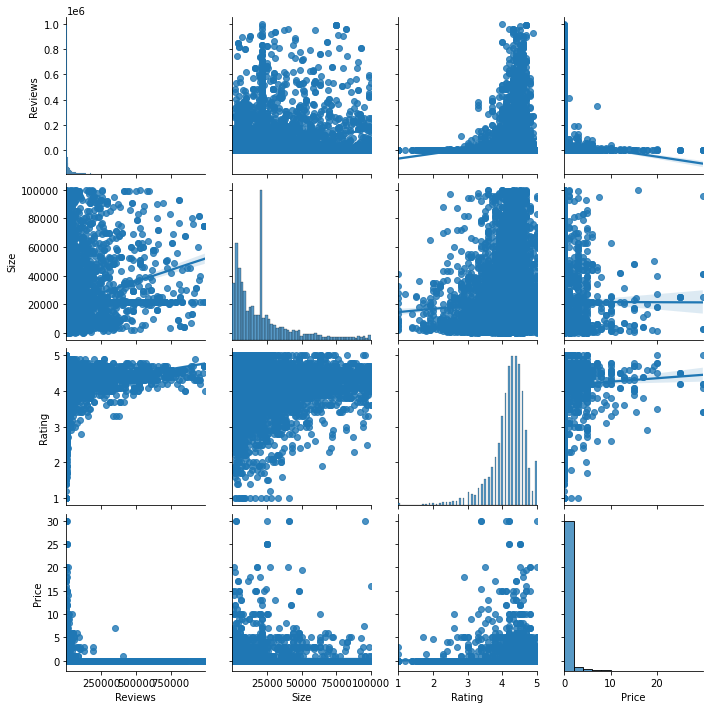

In [218]:
plt.figure(figsize=(14,6))
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

## 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

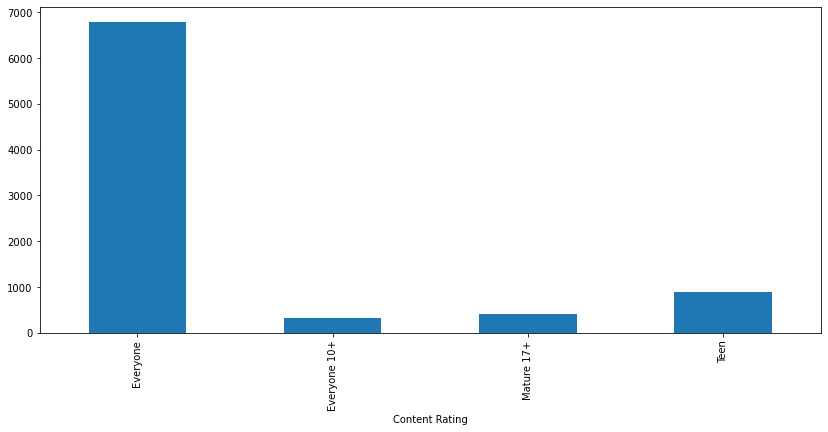

In [219]:
plt.figure(figsize=(14,6))
df.groupby(['Content Rating'])["Rating"].count().plot.bar()
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

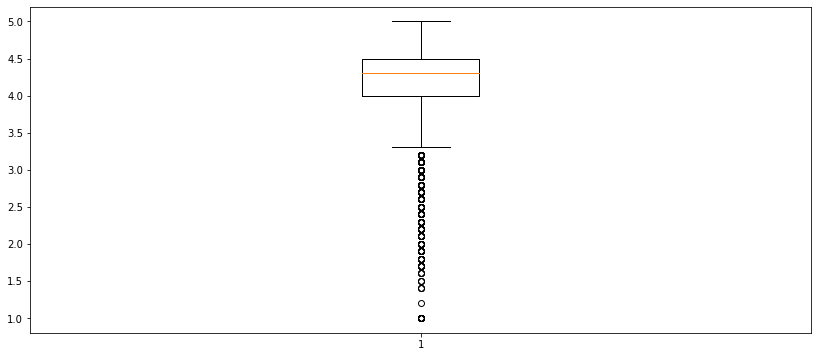

In [220]:
plt.figure(figsize=(14,6))
plt.boxplot(df['Rating'])
plt.show()

### c. Choose the right metric and plot

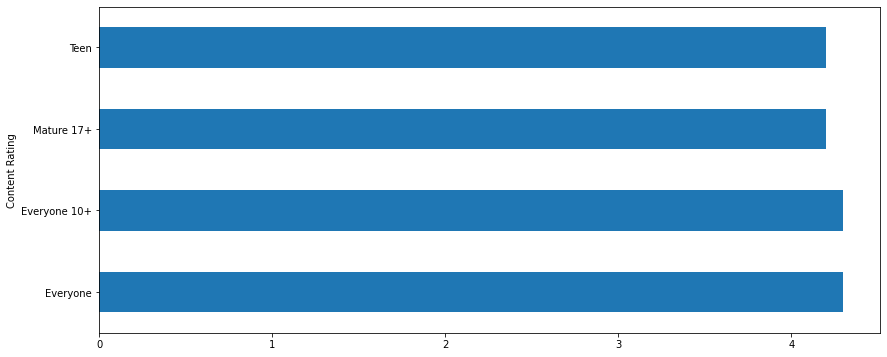

In [221]:
plt.figure(figsize=(14,6))
df.groupby(['Content Rating'])['Rating'].median().plot.barh()
plt.show()

## Task 11. Content rating vs. size vs. rating – 3 variables at a time¶


### a. Create 5 buckets (20% records in each) based on Size

In [234]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [235]:
Table=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
Table

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


### c. Make a heatmap of this

#### i. Annotated

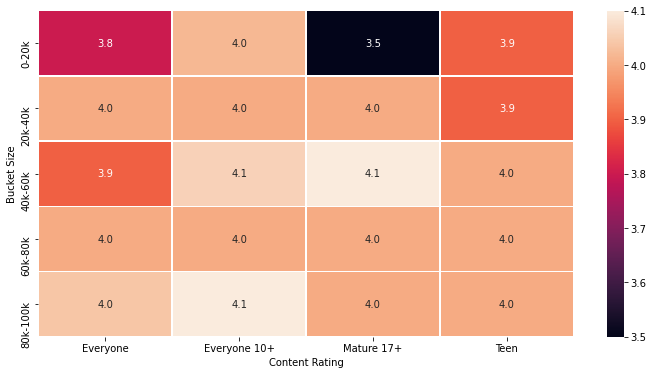

In [244]:
plt.figure(figsize=(12,6))
sns.heatmap(Table, annot=True, linewidths=.5, fmt='.1f')
plt.show()

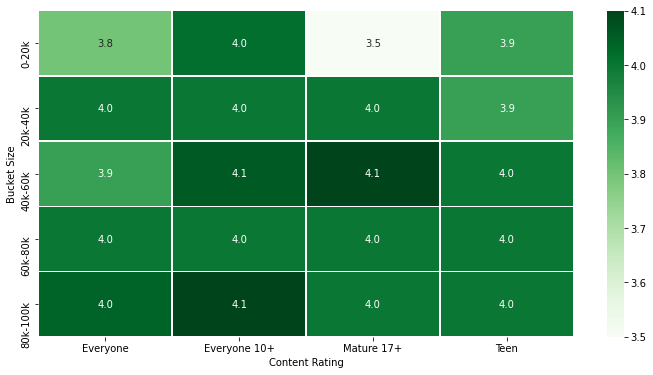

In [243]:
plt.figure(figsize=(12,6))
sns.heatmap(Table, annot=True, linewidths=.5, cmap='Greens',fmt='.1f')
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.